## Week 4: Predicting the next word

Shakespeare's sonnets
* 2000 lines of text extracted from Shakespeare's sonnets

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras import layers, losses
from tensorflow.keras.utils import to_categorical 
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
dataset_path = '../../../data/sonnets.txt'

with open(dataset_path) as f:
    data = f.read()

corpus = data.lower().split('\n')

print(f'{len(corpus)} lines of sonnetts')

2159 lines of sonnetts


In [3]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index)

In [4]:
def n_gram_seqs(corpus, tokenizer):

    input_sequences = []

    for line in corpus:
        seq = tokenizer.texts_to_sequences([line])[0]

        for i in range(1, len(seq)):
            input_sequences.append(seq[:i+1])
    
    return input_sequences

In [5]:
first_example_sequence = n_gram_seqs([corpus[0]], tokenizer)

print("n_gram sequences for first example look like this:")
first_example_sequence

n_gram sequences for first example look like this:


[[34, 417],
 [34, 417, 877],
 [34, 417, 877, 166],
 [34, 417, 877, 166, 213],
 [34, 417, 877, 166, 213, 517]]

In [6]:
next_3_examples_sequence = n_gram_seqs(corpus[1:4], tokenizer)

print("n_gram sequences for next 3 examples look like this:")
next_3_examples_sequence

n_gram sequences for next 3 examples look like this:


[[8, 878],
 [8, 878, 134],
 [8, 878, 134, 351],
 [8, 878, 134, 351, 102],
 [8, 878, 134, 351, 102, 156],
 [8, 878, 134, 351, 102, 156, 199],
 [16, 22],
 [16, 22, 2],
 [16, 22, 2, 879],
 [16, 22, 2, 879, 61],
 [16, 22, 2, 879, 61, 30],
 [16, 22, 2, 879, 61, 30, 48],
 [16, 22, 2, 879, 61, 30, 48, 634],
 [25, 311],
 [25, 311, 635],
 [25, 311, 635, 102],
 [25, 311, 635, 102, 200],
 [25, 311, 635, 102, 200, 25],
 [25, 311, 635, 102, 200, 25, 278]]

In [7]:
input_sequences = n_gram_seqs(corpus, tokenizer)
max_sequence_len = max([len(x) for x in input_sequences])

print(f"len(input_sequences): {len(input_sequences)}")
print(f"max_sequence_len: {max_sequence_len}")

len(input_sequences): 15462
max_sequence_len: 11


In [8]:
def pad_seqs(input_sequences, maxlen):
    
    padded_sequences = pad_sequences(input_sequences, maxlen=maxlen)
    
    return padded_sequences

In [9]:
first_padded_seq = pad_seqs(first_example_sequence, len(first_example_sequence))
first_padded_seq

array([[  0,   0,   0,  34, 417],
       [  0,   0,  34, 417, 877],
       [  0,  34, 417, 877, 166],
       [ 34, 417, 877, 166, 213],
       [417, 877, 166, 213, 517]])

In [10]:
max_sequence_len_3 = max([len(s) for s in next_3_examples_sequence])
next_3_padded_seq = pad_seqs(next_3_examples_sequence, max_sequence_len_3)
next_3_padded_seq

array([[  0,   0,   0,   0,   0,   0,   8, 878],
       [  0,   0,   0,   0,   0,   8, 878, 134],
       [  0,   0,   0,   0,   8, 878, 134, 351],
       [  0,   0,   0,   8, 878, 134, 351, 102],
       [  0,   0,   8, 878, 134, 351, 102, 156],
       [  0,   8, 878, 134, 351, 102, 156, 199],
       [  0,   0,   0,   0,   0,   0,  16,  22],
       [  0,   0,   0,   0,   0,  16,  22,   2],
       [  0,   0,   0,   0,  16,  22,   2, 879],
       [  0,   0,   0,  16,  22,   2, 879,  61],
       [  0,   0,  16,  22,   2, 879,  61,  30],
       [  0,  16,  22,   2, 879,  61,  30,  48],
       [ 16,  22,   2, 879,  61,  30,  48, 634],
       [  0,   0,   0,   0,   0,   0,  25, 311],
       [  0,   0,   0,   0,   0,  25, 311, 635],
       [  0,   0,   0,   0,  25, 311, 635, 102],
       [  0,   0,   0,  25, 311, 635, 102, 200],
       [  0,   0,  25, 311, 635, 102, 200,  25],
       [  0,  25, 311, 635, 102, 200,  25, 278]])

In [11]:
input_sequences = pad_seqs(input_sequences, max_sequence_len)

print(f"padded corpus has shape: {input_sequences.shape}")

padded corpus has shape: (15462, 11)


In [12]:
def features_and_labels(input_sequences, total_words):
    
    list_features = []
    labels = []

    for seq in input_sequences:
        list_features.append(seq[:-1])
        labels.append(seq[-1] - 1)

    features = np.array(list_features)
    one_hot_labels = to_categorical(labels, num_classes=total_words)

    return features, one_hot_labels

In [13]:
first_features, first_labels = features_and_labels(first_padded_seq, total_words)

print(f"labels have shape: {first_labels.shape}")
print("\nfeatures look like this:\n")
first_features

labels have shape: (5, 3210)

features look like this:



array([[  0,   0,   0,  34],
       [  0,   0,  34, 417],
       [  0,  34, 417, 877],
       [ 34, 417, 877, 166],
       [417, 877, 166, 213]])

In [14]:
features, labels = features_and_labels(input_sequences, total_words)

print(f"features have shape: {features.shape}")
print(f"labels have shape: {labels.shape}")

features have shape: (15462, 10)
labels have shape: (15462, 3210)


In [15]:
def create_model(total_words, max_sequence_len):

    embedding_dim = 100
    lstm_dim = 128

    model = tf.keras.Sequential([
        layers.Embedding(total_words, embedding_dim, input_length=max_sequence_len),
        layers.Bidirectional(layers.LSTM(lstm_dim)),
        layers.Dense(total_words)
    ])

    model.compile(optimizer='adam',
                  loss=losses.CategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

    return model

In [16]:
model = create_model(total_words, max_sequence_len-1)

history = model.fit(features, labels, epochs=50, verbose=1)

Epoch 1/50
484/484 [==============================] - 11s 12ms/step - loss: 6.8855 - accuracy: 0.0238
Epoch 2/50
484/484 [==============================] - 5s 11ms/step - loss: 6.4448 - accuracy: 0.0325
Epoch 3/50
484/484 [==============================] - 6s 12ms/step - loss: 6.2318 - accuracy: 0.0400
Epoch 4/50
484/484 [==============================] - 5s 11ms/step - loss: 5.9839 - accuracy: 0.0455
Epoch 5/50
484/484 [==============================] - 5s 11ms/step - loss: 5.7049 - accuracy: 0.0604
Epoch 6/50
484/484 [==============================] - 5s 11ms/step - loss: 5.3748 - accuracy: 0.0739
Epoch 7/50
484/484 [==============================] - 5s 10ms/step - loss: 5.0123 - accuracy: 0.0924
Epoch 8/50
484/484 [==============================] - 5s 10ms/step - loss: 4.6417 - accuracy: 0.1150
Epoch 9/50
484/484 [==============================] - 5s 10ms/step - loss: 4.2685 - accuracy: 0.1535
Epoch 10/50
484/484 [==============================] - 5s 10ms/step - loss: 3.8965 - accur

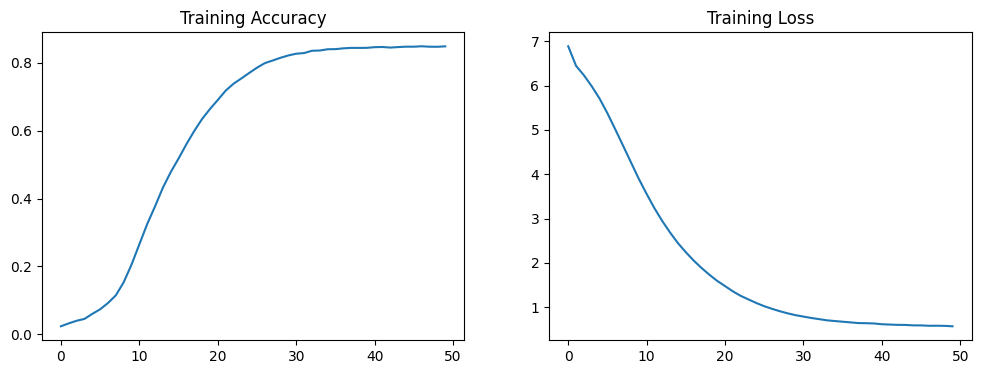

In [17]:
acc = history.history['accuracy']
loss = history.history['loss']

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(acc)
plt.title('Training Accuracy')

plt.subplot(1, 2, 2)
plt.plot(loss)
plt.title('Training Loss')
plt.show()

In [20]:
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict(token_list, verbose=0)
	predicted = np.argmax(predicted, axis=-1).item() + 1
	output_word = tokenizer.index_word[predicted]
	seed_text += " " + output_word

print(seed_text)

Help me Obi Wan Kenobi, you're my only hope of good antique part place of me are dead dead or give none none cured thievish undivided undivided hurt or body large page page up willing ruin'd drops of friend grace to thee leave is so true aright is writ ' prove not seen decay live told to find away thee friend's rare more bright find room so more so strong report new can lose hell truth than one wrong breathers of blood ' lie in my age eye even so in my way mind much right their mind out out cheek my moan of brow myself alone had stol'n
